# **GRIP - The Spark Foundation : Data Science & Business Analytics Intern**

## **Author : Prerana Parmar**

# Task 2 : Prediction using Unupervised ML

**Problem Statement :** From the given 'Iris' dataset, predict the optimum number of clusters and represent it visually.

**K-Means Algorithm :** 
K-means clustering algorithm computes the centroids and iterates until we it finds optimal centroid. In K-Means, each cluster is associated with a centroid. The number of clusters identified from data by algorithm is represented by ‘K’ in K-means.

# 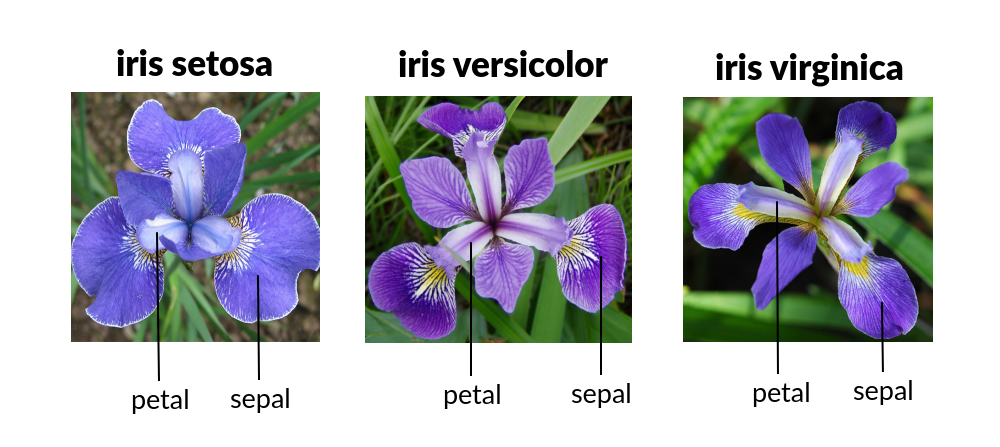

### Importing the libraries

In [91]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
import seaborn as sns

### Load the iris dataset

In [92]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.head()  # See the first 5 rows

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Determinig the optimum number of clusters using The Elbow Method


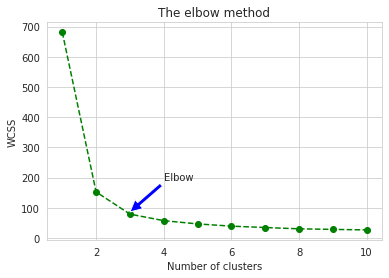

In [93]:
# Finding the optimum number of clusters for k-means classification

x = iris_df.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss, "go--")
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.annotate('Elbow', xytext = (4,190), xy=(3,86), arrowprops = {"facecolor" : "blue"})
plt.show()

You can clearly see why it is called 'The elbow method' from the above graph, the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.

From this, we choose the number of clusters as **3**.

### Creating the kmeans classifier

In [94]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

### Ploting the clusters

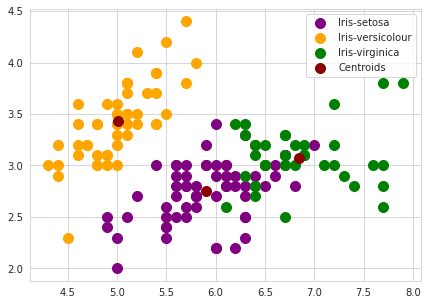

In [95]:
#Visualising the clusters
plt.figure(figsize = (7,5))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'darkred', label = 'Centroids')
plt.legend()

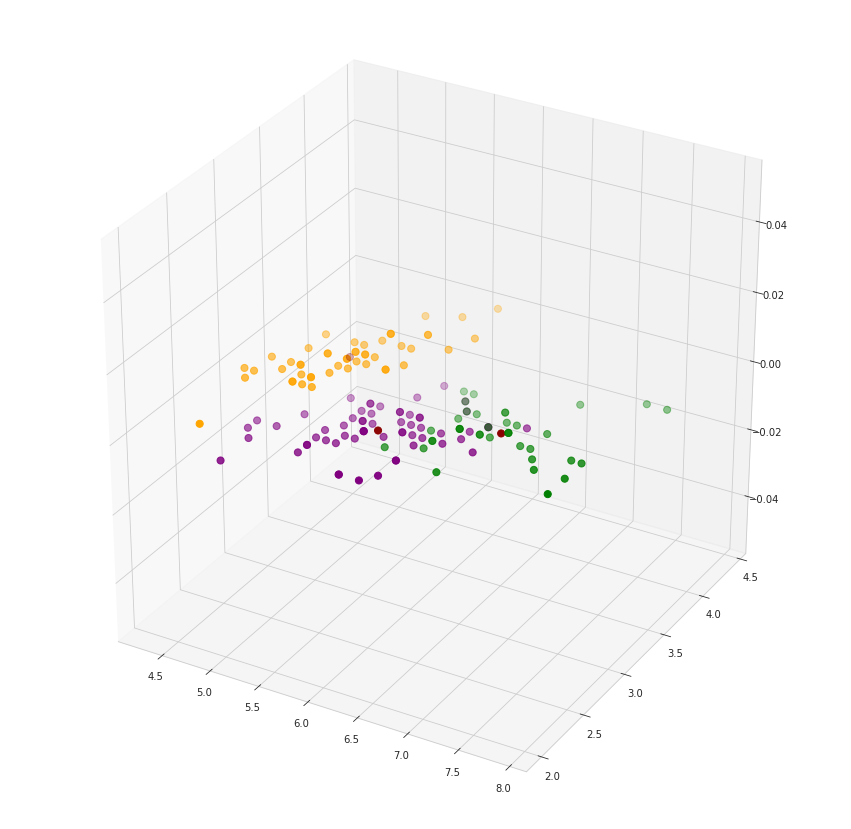

In [96]:
# 3d scatterplot using matplotlib
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 50, c = 'purple', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 50, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 50, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 50, c = 'darkred', label = 'Centroids')
plt.show()

### Labeling the predictions

In [97]:
#considering 0 Corresponds to 'Iris-setosa'
#1 to 'Iris-versicolour'
#2 to 'Iris-virginica'
y_kmeans = np.where(y_kmeans==0, 'Iris-setosa', y_kmeans)
y_kmeans = np.where(y_kmeans=='1', 'Iris-versicolour', y_kmeans)
y_kmeans = np.where(y_kmeans=='2', 'Iris-virginica', y_kmeans)

### Adding the prediction to the dataset

In [98]:
data_with_clusters = iris_df.copy()
data_with_clusters["Cluster"] = y_kmeans
print(data_with_clusters.head(5))

   sepal length (cm)  sepal width (cm)  ...  petal width (cm)           Cluster
0                5.1               3.5  ...               0.2  Iris-versicolour
1                4.9               3.0  ...               0.2  Iris-versicolour
2                4.7               3.2  ...               0.2  Iris-versicolour
3                4.6               3.1  ...               0.2  Iris-versicolour
4                5.0               3.6  ...               0.2  Iris-versicolour

[5 rows x 5 columns]


## **DATA VISUALISATION**

### **Bar Plot - CLUSTER DISTRIBUTION**

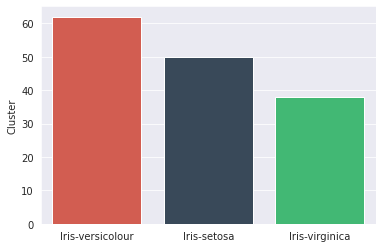

In [99]:
sns.set_style('darkgrid')
sns.barplot(x = data_with_clusters["Cluster"] .unique(),
            y = data_with_clusters["Cluster"] .value_counts(),
            palette=sns.color_palette(["#e74c3c", "#34495e", "#2ecc71"]));

**Bar Plot Assumption :**
There are around 62 iris-versicolour , 50 Iris-setosa and roughly 38 Iris-virginica samples in the dataset as predicted.

## **Violin Plot**

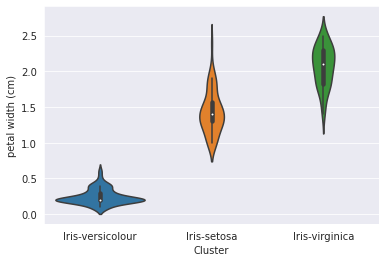

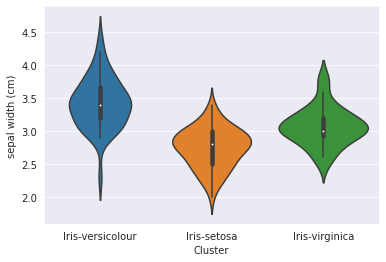

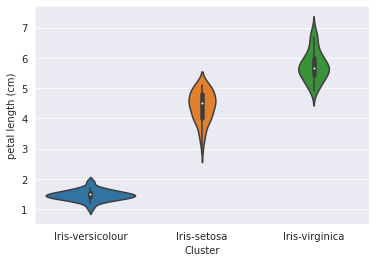

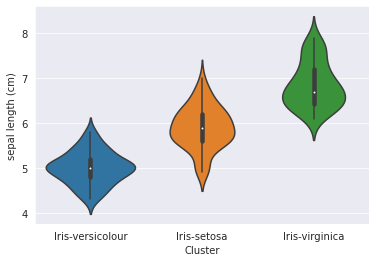

In [100]:
sns.violinplot(x="Cluster", y="petal width (cm)", data=data_with_clusters)
plt.show()
sns.violinplot(x="Cluster", y="sepal width (cm)", data=data_with_clusters)
plt.show()
sns.violinplot(x="Cluster", y="petal length (cm)", data=data_with_clusters)
plt.show()
sns.violinplot(x="Cluster", y="sepal length (cm)", data=data_with_clusters)
plt.show()

## **Pair Plot**

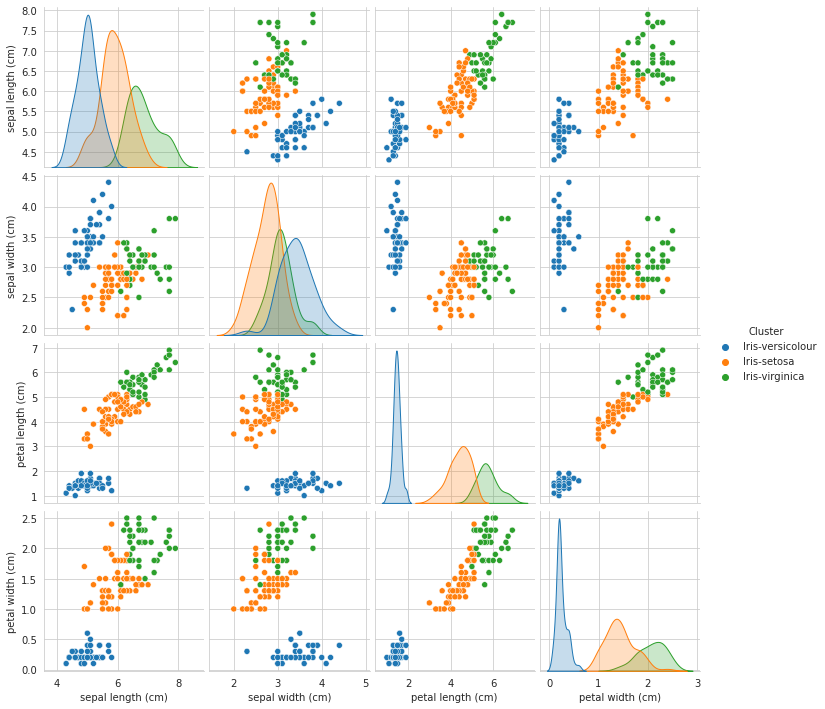

In [101]:
sns.set_style('whitegrid')   #Sets grid style
sns.pairplot(data_with_clusters,hue = 'Cluster');

**PairPlot assumption** : Petal-length and Petal-width seem to be positively correlated (seem to be having a linear relationship).